In [1]:
import pandas as pd 
import numpy as np 
import bokeh
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 35)

In [2]:
data = pd.read_csv('../Data/form/form_0.csv')
data.head()
#data.drop(columns = ['q29','q30','q31','Unnamed: 32','Unnamed: 33'], inplace = True)
data.head()
data = data.set_index('Id Number')

In [3]:
import random

lst = []
for x in range(250): 
    if x< 50: 
        lst.append('Freelancer')
    if 50<=x<100: 
        lst.append('Part-Time')
    elif 100<x<250:
        lst.append('Full-Time')

kind_job = random.sample(lst, len(lst))

len(kind_job)
data['q10'] = pd.Series(kind_job)
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Full-Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import bernoulli

data['q11'] = norm.rvs(loc = 1046, scale = 300, size = 249)
data['q12'] = norm.rvs(loc = 1274, scale = 300, size = 249)
data['q11']

# pordata 

Id Number
1      1189.221375
2       999.335064
3       690.747885
4       206.610993
5      1064.914952
          ...     
245     995.812396
246    1645.527144
247    1008.463990
248    1159.241559
249     851.824410
Name: q11, Length: 249, dtype: float64

In [5]:
""" data['q12'] = (data['q10']-data['q11'])/data['q10']

data.rename(columns= {'q9':'job_type','q10':'your_salary','q11':'male_salary','q12':'perceived_gap'}, inplace = True)
data.head()

#calculated """

" data['q12'] = (data['q10']-data['q11'])/data['q10']\n\ndata.rename(columns= {'q9':'job_type','q10':'your_salary','q11':'male_salary','q12':'perceived_gap'}, inplace = True)\ndata.head()\n\n#calculated "

In [6]:
data['q13'] = norm.rvs(loc = 0.4565, scale = 0.14, size = 249)
#data.rename(columns= {'q13':'perc_women'}, inplace = True)
#data.head()

# trading economics

(array([ 90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

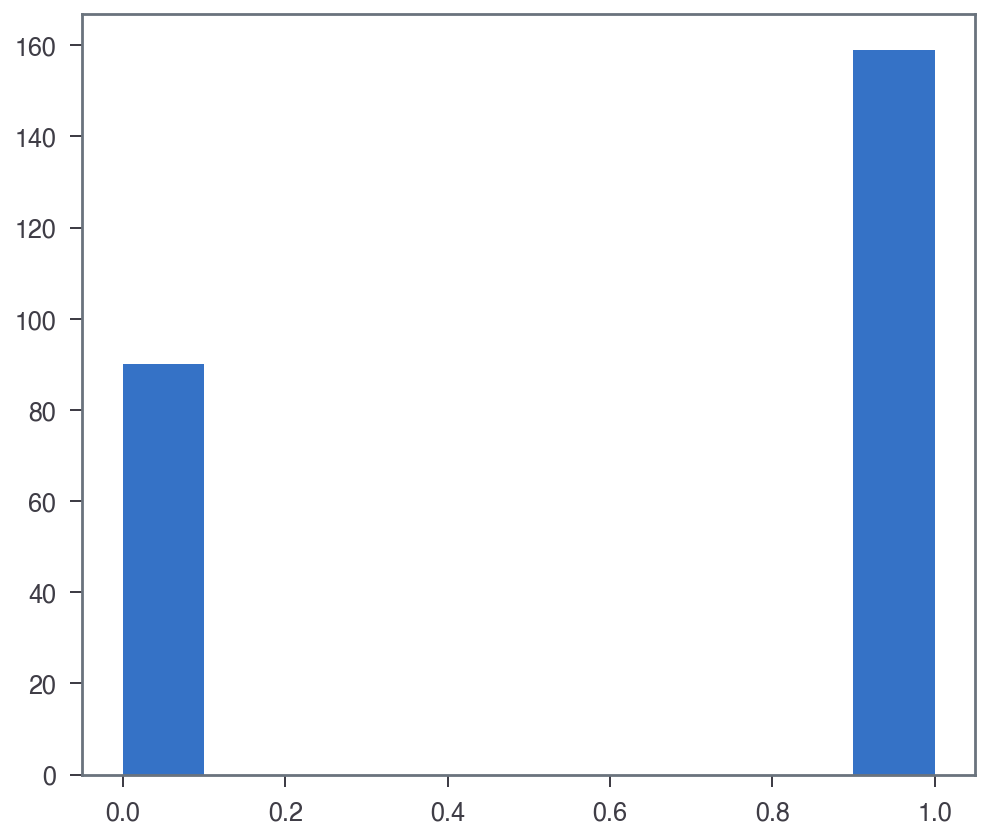

In [7]:
# Generating random variables
binomial = bernoulli.rvs(0.6, size = 249)
plt.hist(binomial)


#data.rename(columns= {'q13':'perc_women'}, inplace = True)
#data.head()


In [8]:
data['q14'] = norm.rvs(loc = 0.10, scale = 0.02, size = 249)

#data.rename(columns= {'q14':'perc_women_exec'}, inplace = True)
#data.head()

#Eurostat

In [9]:
data['q15'] = norm.rvs(loc = 0.22, scale = 0.06, size = 249)

#data.rename(columns= {'q15':'perc_women_manag'}, inplace = True)
#data.head()

#Eurostat

In [10]:
data['q16'] = 1-data['q15']-data['q14']

#data.rename(columns= {'q16':'perc_women_other'}, inplace = True)
#data.head()

# Maybe we need to take this out - doesn't add information. 

In [11]:
data['q17'] = bernoulli.rvs(0.078, size = 249)

#data.rename(columns= {'q17':'admin_gender_strat'}, inplace = True)
#data.head()

# estimated from Australian Model 

In [12]:
data['q18'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q18':'w_promotion_as_likely'}, inplace = True)
#data.head()


# According to Mcckinsey, women 15 less likely to get promoted. 

In [13]:
data['q19'] = bernoulli.rvs(0.6, size = 249)

#data.rename(columns= {'q19':'w_resignation_as_likely'}, inplace = True)
#data.head()

# Forbes 
# Women are more likely to resign, 31% vs 24%, even bigger at the top level, 24% vs 7%

In [14]:
data['q20'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q20':'w_fired_as_likely'}, inplace = True)
#data.head()

# Fortune -45% more likely to get fired 

In [15]:
data['q21'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q21':'organization_concerned'}, inplace = True)
#data.head()

# Women 3 times more likely 
# Data from Cnbc poll
# https://www.cnbc.com/2017/12/19/one-fifth-of-american-adults-have-been-sexually-harassed-at-work.html

In [16]:
data['q22'] = bernoulli.rvs(0.2, size = 249)

#data.rename(columns= {'q22':'organization_proactive_gi'}, inplace = True)
#data.head()

In [17]:
data['q23'] = bernoulli.rvs(0.7, size = 249)

#data.rename(columns= {'q23':'parental_leave'}, inplace = True)
#data.head()

In [18]:
data['q24'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q24':'child_penalty'}, inplace = True)
#data.head()

In [19]:
data['q25'] = bernoulli.rvs(0.3, size = 249)

#data.rename(columns= {'q25':'work_harassment'}, inplace = True)
#data.head()

# according to CNBC's poll 

In [20]:
data['q26'] = bernoulli.rvs(0.25, size = 249)

#data.rename(columns= {'q26':'company_harassment_procedures'}, inplace = True)
#data.head()

In [21]:
data['q27'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q27':'company_support_domestic_abuse'}, inplace = True)
#data.head()

In [22]:
data.columns #to_json('final_test.json')

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28'],
      dtype='object')

In [23]:
data.drop(columns = 'q28', inplace = True )

In [24]:
data.to_json('final_test.json')

In [25]:
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1189.221375,1218.170302,0.121690,0.101628,0.321815,0.576557,0,0,1,0,1,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,1,Freelancer,999.335064,1382.878381,0.767792,0.102379,0.155321,0.742300,0,1,0,0,0,0,1,0,0,0,0
3,1,1,1,1,1,1,1,1,1,Full-Time,690.747885,1247.805808,0.525766,0.079035,0.230607,0.690358,0,1,1,1,0,0,1,1,0,0,0
4,1,1,1,1,1,1,1,1,1,Freelancer,206.610993,1476.602834,0.544528,0.080794,0.184057,0.735150,0,1,0,0,1,0,1,1,1,0,1
5,1,1,1,1,1,1,1,1,1,Full-Time,1064.914952,1764.391640,0.333290,0.105200,0.147782,0.747018,0,1,0,1,1,0,1,0,0,0,1


In [26]:
# Value checking for the plot below
data['q27'].value_counts()#[0] #/ data.shape[0]
#data.shape[0]
#questions = ['Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27']

0    148
1    101
Name: q27, dtype: int64

## Bokeh Plots

In [43]:
# Bokeh stuff
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import Figure, figure
from bokeh.embed import components, file_html, json_item
from bokeh.layouts import row, column
from bokeh.models import CategoricalColorMapper, ColumnDataSource, MultiSelect, HoverTool
from bokeh.resources import CDN
from bokeh.palettes import all_palettes

import json

In [64]:
all_palettes['Pastel1'][4]

['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4']

In [66]:
# PLOT ABOUT QUESTIONS 17-27 (YES OR NO ANSWERS)
#from bokeh.io import show, output_file
#from bokeh.plotting import figure

output_file("plot_q17-27.html") # don't know if it worked with .json?

questions = ['Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27']
answers = ['Yes', 'No']
colors = ['#fbb4ae', '#b3cde3']

data1 = {'questions': questions,
        'Yes': [data['q17'].value_counts()[1]/data.shape[0], data['q18'].value_counts()[1]/data.shape[0], 
                data['q19'].value_counts()[0]/data.shape[0], data['q20'].value_counts()[1]/data.shape[0], 
                data['q21'].value_counts()[1]/data.shape[0], data['q22'].value_counts()[1]/data.shape[0],
                data['q23'].value_counts()[0]/data.shape[0], data['q24'].value_counts()[1]/data.shape[0], 
                data['q25'].value_counts()[1]/data.shape[0], data['q26'].value_counts()[1]/data.shape[0], 
                data['q27'].value_counts()[1]/data.shape[0]],
        'No': [data['q17'].value_counts()[0]/data.shape[0], data['q18'].value_counts()[0]/data.shape[0], 
               data['q19'].value_counts()[1]/data.shape[0], data['q20'].value_counts()[0]/data.shape[0], 
               data['q21'].value_counts()[0]/data.shape[0], data['q22'].value_counts()[0]/data.shape[0],
               data['q23'].value_counts()[1]/data.shape[0], data['q24'].value_counts()[0]/data.shape[0], 
               data['q25'].value_counts()[0]/data.shape[0], data['q26'].value_counts()[0]/data.shape[0], 
               data['q27'].value_counts()[0]/data.shape[0]]}

p1 = figure(x_range = questions, plot_height = 250, title = "Title here",
           toolbar_location = None, tools = "")

p1.vbar_stack(answers, x = 'questions', width = 0.9, color = colors, source = data1,
             legend_label = answers)

p1.y_range.start = 0
p1.x_range.range_padding = 0.1
p1.xgrid.grid_line_color = None
p1.axis.minor_tick_line_color = None
p1.outline_line_color = None
p1.legend.location = "top_left"
p1.legend.orientation = "horizontal"

show(p1)

In [67]:
# SECOND PLOT ABOUT NUMB OF EXEC/MANAGER/OTHER WOMEN

output_file("women_exec_manag_other.html")

questions1 = ['Women in a company']
answers1 = ['number of executives', 'number of managers', 'other']
colors = ['#fbb4ae', '#b3cde3', '#decbe4']

data2 = {'questions1': questions1,
        'number of executives': [data.q14.mean(), data.q14.mean(), data.q14.mean()],
        'number of managers': [data.q15.mean(), data.q15.mean(), data.q15.mean()],
        'other': [data.q16.mean(), data.q16.mean(), data.q16.mean()]}

p2 = figure(x_range = questions1, plot_height = 250, title = "Title here",
           toolbar_location = None, tools = "")

p2.vbar_stack(answers1, x = 'questions1', width = 0.9, color = colors, source = data2, legend_label = answers1)

p2.y_range.start = 0
p2.x_range.range_padding = 0.1
p2.xgrid.grid_line_color = None
p2.axis.minor_tick_line_color = None
p2.outline_line_color = None
p2.legend.location = "top_left"
p2.legend.orientation = "horizontal"

show(p2)

### Exporting the Plots to JS Script

In [51]:
# Plot 1
script, div = components(p1) 
print(script)


<script type="text/javascript">
    (function() {
          var fn = function() {
            Bokeh.safely(function() {
              (function(root) {
                function embed_document(root) {
                  
                var docs_json = '{"78560fa8-193f-49f5-b29b-ffdf34d5b1d9":{"roots":{"references":[{"attributes":{"below":[{"id":"3056","type":"CategoricalAxis"}],"center":[{"id":"3059","type":"Grid"},{"id":"3064","type":"Grid"},{"id":"3081","type":"Legend"}],"left":[{"id":"3060","type":"LinearAxis"}],"outline_line_color":{"value":null},"plot_height":250,"renderers":[{"id":"3074","type":"GlyphRenderer"},{"id":"3087","type":"GlyphRenderer"}],"title":{"id":"3046","type":"Title"},"toolbar":{"id":"3065","type":"Toolbar"},"toolbar_location":null,"x_range":{"id":"3048","type":"FactorRange"},"x_scale":{"id":"3052","type":"CategoricalScale"},"y_range":{"id":"3050","type":"DataRange1d"},"y_scale":{"id":"3054","type":"LinearScale"}},"id":"3045","subtype":"Figure","type":"Plot"},{"a

In [52]:
# Plot 2
script, div = components(p2) 
print(script)


<script type="text/javascript">
    (function() {
          var fn = function() {
            Bokeh.safely(function() {
              (function(root) {
                function embed_document(root) {
                  
                var docs_json = '{"f486e099-96c0-471d-9b2b-f6b2f0776bf1":{"roots":{"references":[{"attributes":{"grid_line_color":null,"ticker":{"id":"3218","type":"CategoricalTicker"}},"id":"3220","type":"Grid"},{"attributes":{"data_source":{"id":"3246","type":"ColumnDataSource"},"glyph":{"id":"3248","type":"VBar"},"hover_glyph":null,"muted_glyph":null,"name":"number of managers","nonselection_glyph":{"id":"3249","type":"VBar"},"selection_glyph":null,"view":{"id":"3251","type":"CDSView"}},"id":"3250","type":"GlyphRenderer"},{"attributes":{},"id":"3285","type":"Selection"},{"attributes":{"active_drag":"auto","active_inspect":"auto","active_multi":null,"active_scroll":"auto","active_tap":"auto"},"id":"3226","type":"Toolbar"},{"attributes":{"bottom":{"expr":{"id":"3231","

In [ ]:
'''from bokeh.io import show, output_file
from bokeh.plotting import figure

#output_file("stacked.html")

questions = ['Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27']
answers = ["Yes", "No"]
colors = ["#c9d9d3", "#718dbf"]

data1 = {'questions': questions,
        'Yes': [data['q17'].value_counts()[1], data['q18'].value_counts()[1], data['q19'].value_counts()[0], 
                data['q20'].value_counts()[1], data['q21'].value_counts()[1], data['q22'].value_counts()[1],
                data['q23'].value_counts()[0], data['q24'].value_counts()[1], data['q25'].value_counts()[1], 
                data['q26'].value_counts()[1], data['q27'].value_counts()[1]],
        'No': [data['q17'].value_counts()[0], data['q18'].value_counts()[0], data['q19'].value_counts()[1], 
                data['q20'].value_counts()[0], data['q21'].value_counts()[0], data['q22'].value_counts()[0],
                data['q23'].value_counts()[1], data['q24'].value_counts()[0], data['q25'].value_counts()[0], 
                data['q26'].value_counts()[0], data['q27'].value_counts()[0]]}

p = figure(x_range = questions, plot_height = 250, title = "Title here",
           toolbar_location = None, tools = "")

p.vbar_stack(answers, x = 'questions', width = 0.9, color = colors, source = data1,
             legend_label = answers)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)'''
# test